# Моделирование силовых линий электрического поля двух точечных зарядов вблизи проводящей плоскости.
  ### Задание для вычислительного эксперимента:
  * построить силовые линии электрического поля для разных сочетаний знаков зарядов в случае равноудалённости зарядов друг от друга и от плоскости;
  * наложить на изображение силовых линий вблизи плоскости график распределения поверхностной плотности заряда на плоскости.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm
from scipy.constants import e
from scipy.constants import epsilon_0
k = (1) / (4 * np.pi * epsilon_0)
import math
import threading
plt.rcParams['text.usetex'] = True
plt.style.use('Solarize_Light2')
font = {'family': 'normal',
        'weight': 'bold',
        'size': 24, }

plt.rc('font', **font)


$$\vec{E}(\vec{r})=\dfrac{1}{4\pi\varepsilon_0}\dfrac{q}{\varepsilon r^2}\left(\dfrac{\vec{r}}{r}\right) = k\dfrac{q\vec{r}}{\varepsilon r^3}, \  где \ \vec{r}$$
<p style="text-align: center; font: serif"> - вектор, соединяющий точечный заряд и точку, в которой ищется напряженность поля.<p>


#### Принцип суперпозиции
$$\vec{E}(\vec{r})=\sum_i{\vec{E_i}(\vec{r})}$$

In [36]:
def E(q, r0, x, y):
    dist = np.hypot(x-r0[0], y-r0[1])**3
    return (k * q * (x - r0[0]) / dist), (k * q * (y - r0[1]) / dist)

$$\sigma(\vec{r})=\left|\vec{E}(\vec{r})\right|\varepsilon\varepsilon_0 = \dfrac{qr}{4\pi r^3} = \dfrac{q}{4\pi r^2}$$

In [51]:
def sigma(q, r0, x, y):
    return (q) / (4 * np.pi * np.linalg.norm([x - r0[0], y - r0[1]]) ** 2)


In [52]:
def plot_surface(y):
    plt.plot([0 for i in y], y, c='black', linewidth=10)

In [60]:

def model(a, b):
    nq = 4

    nx, ny = 64, 64
    x = np.linspace(-2, 2, nx)
    y = np.linspace(-2, 2, ny)
    X, Y = np.meshgrid(x, y)
    charges = []
    q = 100*e

    charges.append((a * q, (1, .5)))
    charges.append((b * q, (1, -.5)))
    charges.append((-a * q, (-1, .5)))
    charges.append((-b * q, (-1, -.5)))

    Sigma = np.zeros((nx, ny))

    for charge in charges:
        for i in range(len(x)):
            for j in range(len(y)):
                Sigma[i][j] += sigma(*charge, x[i], y[j])

    Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
    for charge in charges:
        ex, ey = E(*charge, x=X, y=Y)
        Ex += ex
        Ey += ey

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    color = 2 * np.log(np.hypot(Ex, Ey))
    ax.streamplot(x, y, Ex, Ey, linewidth=1, color=color, cmap=plt.cm.cool,
                  density=3, arrowstyle='->', arrowsize=1.5)

    plot_surface(y)

    charge_colors = {True: '#aa0000', False: '#0000aa'}
    for q, pos in charges:
        ax.add_artist(Circle(pos, 0.05, color=charge_colors[q > 0]))

    ax.set_xlabel(r'x')
    ax.set_ylabel(r'y')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

    plt.plot(np.abs(Sigma[32]) * 10 ** 18.5, x,
             color='red', linewidth=1, label=r'$\sigma$')
    plt.legend(labelcolor='linecolor')
    plt.grid(color='black')
    plt.show()


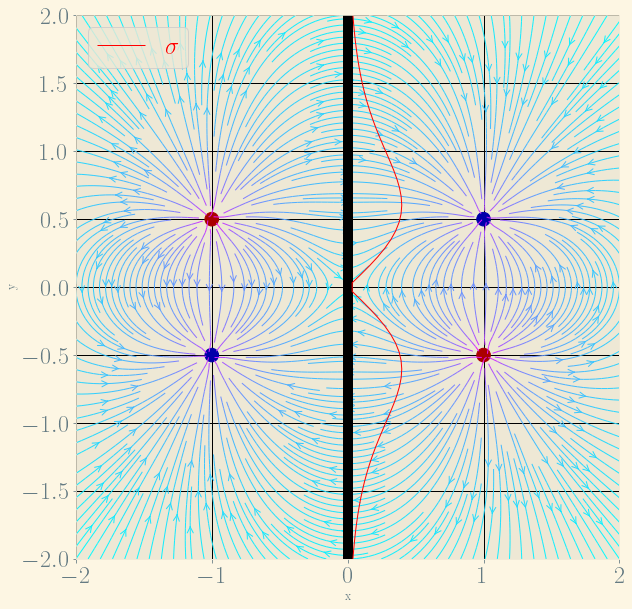

In [61]:
model(-1, 1)

In [64]:
def main():
    for i in [-1, 1]:
        for j in [-1, 1]:
            thread = threading.Thread(target = model(i, j))
            thread.start()


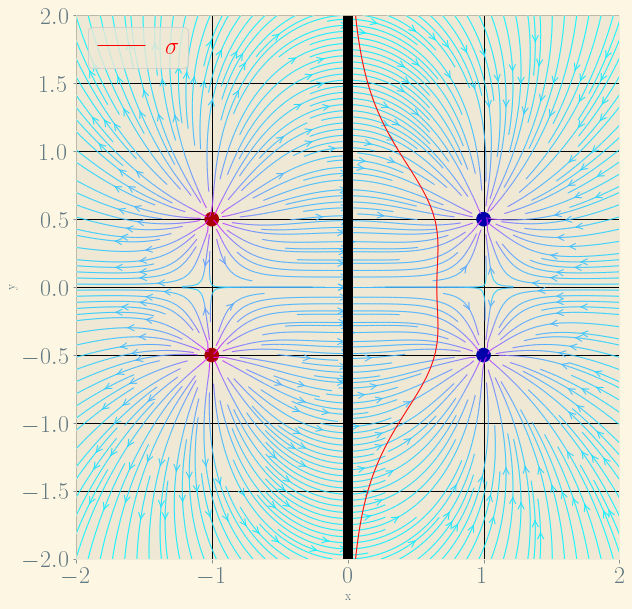

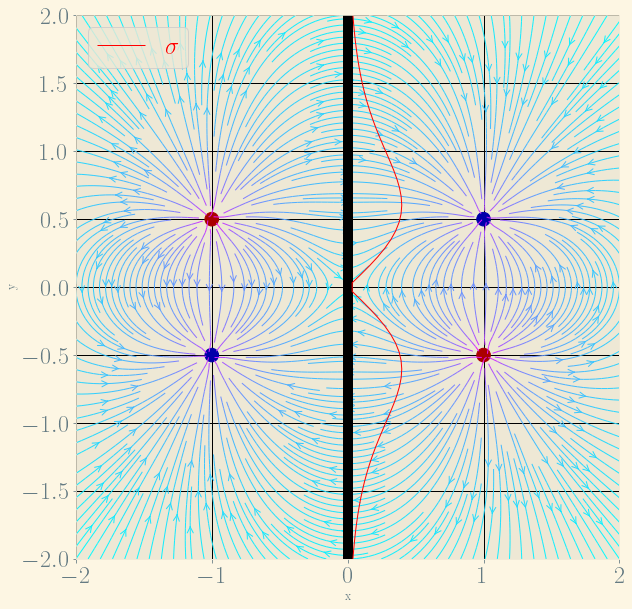

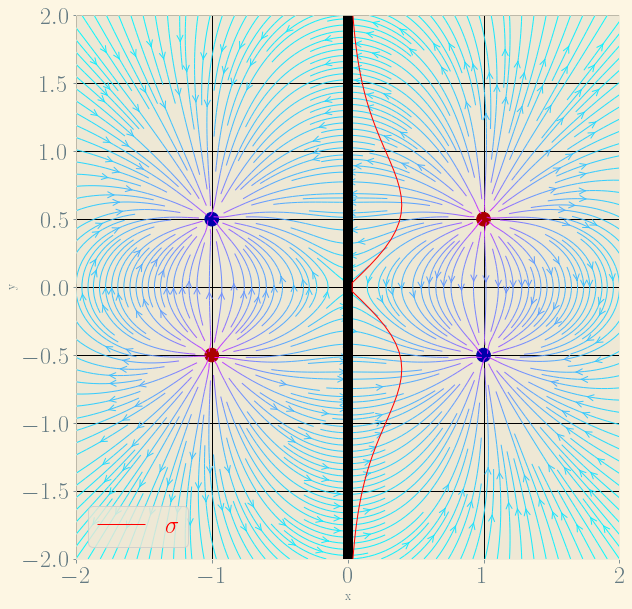

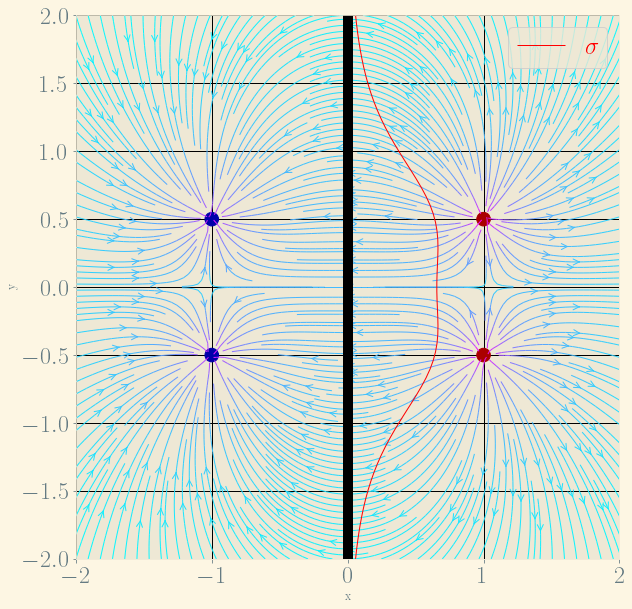

In [48]:
main()

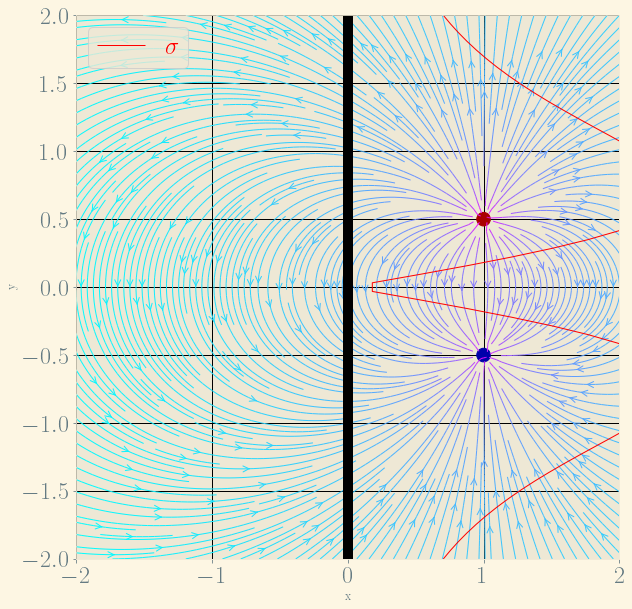

In [63]:
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)
charges = []
q = 100*e

charges.append(( q, (1, .5)))
charges.append(( -q, (1, -.5)))

Sigma = np.zeros((nx, ny))

for charge in charges:
    for i in range(len(x)):
        for j in range(len(y)):
            Sigma[i][j] += sigma(*charge, x[i], y[j])

Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, linewidth=1, color=color, cmap=plt.cm.cool,
                density=3, arrowstyle='->', arrowsize=1.5)

ax.plot([0 for i in y], y, c='black', linewidth=10)

charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q > 0]))

ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

plt.plot(np.abs(Sigma[32]) * 10 ** 18.5, x,
            color='red', linewidth=1, label=r'$\sigma$')
plt.legend(labelcolor='linecolor')
plt.grid(color='black')
plt.show()